In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

# Starting with the usual trivial dataset:

| Size (1000 sqft) | Price ($1000) |
| ---------------- | ------------- |
| 1                | 300           |
| 2                | 500           |


In [3]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

# Compute Cost

$$\Large J(w, b) = \frac{1}{2m} \sum^{m - 1}_{i = 0}(f_{w, b}(x^{(i)}) - y^{(i)})^2$$

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        cost += (w * x[i] + b - y[i]) ** 2
    return cost / (2 * m)

# Gradient Descent

Repeat until convergence {

$$\large w -= \alpha \frac{\delta}{\delta w}J(w, b)$$

$$\large b -= \alpha \frac{\delta}{\delta b}J(w, b)$$

}

(Simultaneous update)

# Requirement to Implement Gradient Descent

- compute_gradient (implementing the methods in Gradient Descent
- compute_cost: Done.
- gradient_descent: Using both compute functions.

In [47]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dw = 0
    db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        err = f_wb - y[i]
        dw_i = err * x[i]
        db_i = err
        
        dw += dw_i
        db += db_i
        
    dw /= m
    db /= m
    
    return dw, db

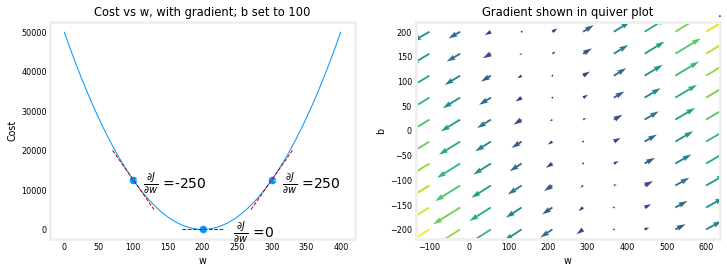

In [48]:
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

In [51]:
def gradient_descent(x, y, w=0, b=0, alpha=0.01, iters=1000, min_step=0.001, grad_func=compute_gradient, cost_func=compute_cost):
    J_history = [] # Records
    w_b_history = []
    max_iters = 10000
    
    for i in range(min(iters, max_iters)):
        dw, db = grad_func(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        
        J_history.append(cost_func(x, y, w, b))
        w_b_history.append((w, b))
        
        if (i % (iters / 10) == 0):
            print(f"""Iter {i:4}\tCost: {J_history[-1]: 0.2e}\tdw: {dw: 0.3e}\tdb: {db: 0.3e}\tw: {w: 0.3e}\tb: {b: 0.3e}""")
            
    return w, b, J_history, w_b_history

In [84]:
w_min, b_min, J_history, wb_history = gradient_descent(x_train, y_train, alpha=0.1)
print(f"\nResults:\nw = {w_min: 0.3e}\tb = {b_min: 0.5e}\n")

Iter    0	Cost:  3.67e+04	dw: -6.500e+02	db: -4.000e+02	w:  6.500e+01	b:  4.000e+01
Iter  100	Cost:  3.35e+00	dw: -3.703e-01	db:  5.992e-01	w:  1.950e+02	b:  1.082e+02
Iter  200	Cost:  7.75e-01	dw: -1.781e-01	db:  2.881e-01	w:  1.976e+02	b:  1.039e+02
Iter  300	Cost:  1.79e-01	dw: -8.563e-02	db:  1.386e-01	w:  1.988e+02	b:  1.019e+02
Iter  400	Cost:  4.14e-02	dw: -4.118e-02	db:  6.663e-02	w:  1.994e+02	b:  1.009e+02
Iter  500	Cost:  9.58e-03	dw: -1.980e-02	db:  3.204e-02	w:  1.997e+02	b:  1.004e+02
Iter  600	Cost:  2.22e-03	dw: -9.522e-03	db:  1.541e-02	w:  1.999e+02	b:  1.002e+02
Iter  700	Cost:  5.12e-04	dw: -4.579e-03	db:  7.409e-03	w:  1.999e+02	b:  1.001e+02
Iter  800	Cost:  1.18e-04	dw: -2.202e-03	db:  3.563e-03	w:  2.000e+02	b:  1.000e+02
Iter  900	Cost:  2.74e-05	dw: -1.059e-03	db:  1.713e-03	w:  2.000e+02	b:  1.000e+02

Results:
w =  2.000e+02	b =  1.00011e+02



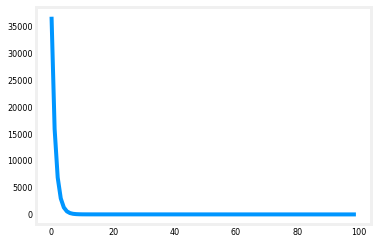

In [85]:
# Plot cost vs iter
plt.plot(J_history[:100])
plt.show()

In [86]:
questions = [
    .15, .5, 5, 2, 20, 1.2, 1
]

for q in questions:
    print(f"Prediction for a house of {int(q * 1000): 6}sqft: ${int(1000 * w_min * q + b_min)}")

Prediction for a house of    150sqft: $30098
Prediction for a house of    500sqft: $100096
Prediction for a house of   5000sqft: $1000065
Prediction for a house of   2000sqft: $400086
Prediction for a house of  20000sqft: $3999960
Prediction for a house of   1200sqft: $240091
Prediction for a house of   1000sqft: $200093


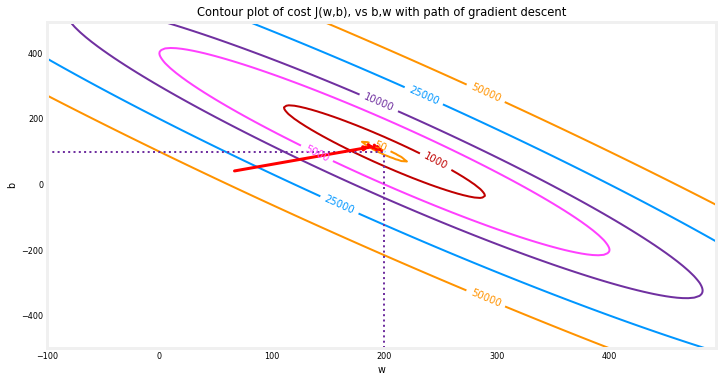

In [87]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plt_contour_wgrad(x_train, y_train, wb_history, ax)

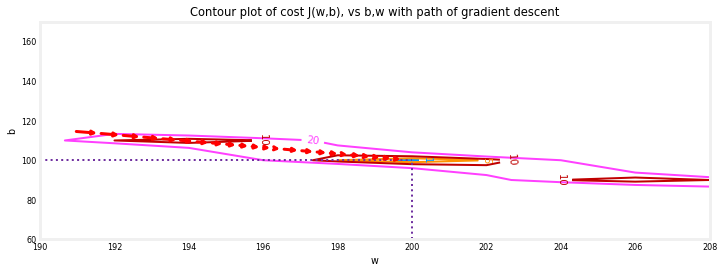

In [88]:
fig, ax = plt.subplots(1,1, figsize=(12,4))
plt_contour_wgrad(x_train, y_train, wb_history, ax, w_range=[190, 210, 2],b_range=[60, 180, 10], 
                  contours=[1,5,10,20], resolution=0.5)